In [ ]:

import pandas as pd
import networkx as nx

#gen_scores = pd.read_csv('genome-scores.csv')
#print(gen_scores.head())

#gen_tags = pd.read_csv('genome-tags.csv')
#print(gen_tags.head())

#links = pd.read_csv('links.csv')
#print(links.head())
movies = pd.read_csv('movies.csv')



#ratings = pd.read_csv('ratings.csv')
#print(ratings.head())





In [ ]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Visualizza le ultime 5 righe del DataFrame
ultime_righe = movies.tail()
ultime_righe

# Per visualizzare le ultime n righe, ad esempio le ultime 10 righe
ultime_10_righe = movies.tail(10)
ultime_10_righe

,movieId,title,genres
62413,209145,Liberté (2019),Drama
62414,209147,The Carpet of Horror (1962),Crime|Horror
62415,209151,Mao Zedong 1949 (2019),(no genres listed)
62416,209153,Happy Flight (2008),Comedy|Drama
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [ ]:
import pickle
with open('list_movies.pkl', 'wb') as file:
    pickle.dump(movies, file)

In [ ]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ratings = pd.read_csv('ratings.csv')

In [ ]:
df=ratings
df['userId'] = 'u_' + df['userId'].astype(str)

# Verifica i primi record del DataFrame per assicurarti che gli ID degli utenti abbiano il prefisso
print(ratings.head())

  userId  movieId  rating   timestamp
0    u_1      296     5.0  1147880044
1    u_1      306     3.5  1147868817
2    u_1      307     5.0  1147868828
3    u_1      665     5.0  1147878820
4    u_1      899     3.5  1147868510


In [ ]:
G = nx.Graph()

# Aggiungi nodi userId e movieId come bipartizione
user_ids = df['userId'].unique()
movie_ids = df['movieId'].unique()
G.add_nodes_from(user_ids, bipartite=0)  # Nodi della prima bipartizione
G.add_nodes_from(movie_ids, bipartite=1)  # Nodi della seconda bipartizione

# Aggiungi archi con i rating come peso
counter = 0  # Inizializza il contatore

for _, row in df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    rating = row['rating']
    G.add_edge(user_id, movie_id, weight=rating)

    # Incrementa il contatore di 1 ad ogni iterazione
    counter += 1

    # Stampa il valore del contatore ogni 1000000 righe
    if counter % 1000000 == 0:
        print(f"Righe processate: {counter} su {len(df)}")


# Esempio per ottenere i vicini di un nodo userId
user_neighbors = list(G.neighbors(1))  # Sostituisci 1 con l'userId desiderato
print(f"Vicini di userId 1: {user_neighbors}")




Righe processate: 1000000 su 25000095
Righe processate: 2000000 su 25000095
Righe processate: 3000000 su 25000095
Righe processate: 4000000 su 25000095
Righe processate: 5000000 su 25000095
Righe processate: 6000000 su 25000095
Righe processate: 7000000 su 25000095
Righe processate: 8000000 su 25000095
Righe processate: 9000000 su 25000095
Righe processate: 10000000 su 25000095
Righe processate: 11000000 su 25000095
Righe processate: 12000000 su 25000095
Righe processate: 13000000 su 25000095
Righe processate: 14000000 su 25000095
Righe processate: 15000000 su 25000095
Righe processate: 16000000 su 25000095
Righe processate: 17000000 su 25000095
Righe processate: 18000000 su 25000095
Righe processate: 19000000 su 25000095
Righe processate: 20000000 su 25000095
Righe processate: 21000000 su 25000095
Righe processate: 22000000 su 25000095
Righe processate: 23000000 su 25000095
Righe processate: 24000000 su 25000095
Righe processate: 25000000 su 25000095
Vicini di userId 1: ['u_2', 'u_3',

In [ ]:
#verifico sia bipartita
is_bipartite, bipartite_sets = nx.bipartite.sets(G)

if is_bipartite:
    print("La rete è bipartita.")

else:
    print("La rete non è bipartita.")

La rete è bipartita.


In [ ]:


# Assumi che tu abbia già creato il tuo grafo G come descritto nel tuo codice
# Verifica se ci sono archi tra i film
movies = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]

for movie in movies:
    neighbors = list(G.neighbors(movie))
    movie_neighbors = [neighbor for neighbor in neighbors if G.nodes[neighbor]['bipartite'] == 1]
    if len(movie_neighbors) > 0:
        print(f"Archi tra il film {movie} e altri film: {movie_neighbors}")


In [ ]:
import pickle
with open('grafo_bipartito.pickle', 'wb') as file:
    pickle.dump(G, file)

In [ ]:
#Questo se voglio aprire il file devo sempre essere conneso su drive
import pickle
with open('grafo_bipartito.pickle', 'rb') as file:
    G = pickle.load(file)

FileNotFoundError: ignored

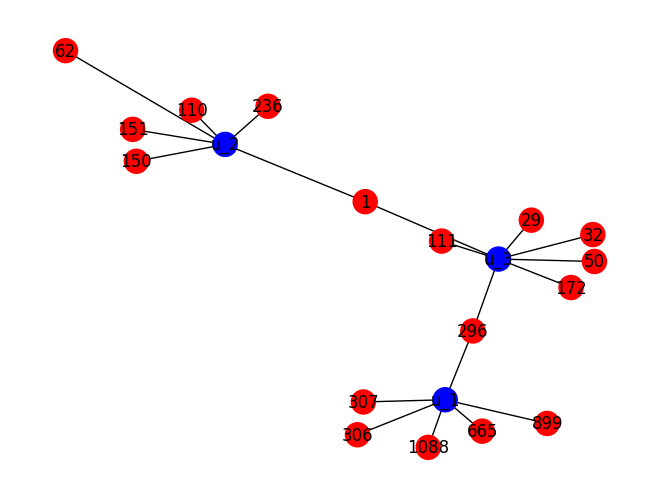

In [ ]:
import matplotlib.pyplot as plt
# Supponiamo che tu abbia già creato il grafo bipartito G come descritto precedentemente.

# Estrai i primi tre utenti
users_to_plot = [user_id for user_id in G.nodes if G.nodes[user_id]['bipartite'] == 0][:3]

# Crea un dizionario per memorizzare i primi tre film connessi a ciascun utente
connected_movies = {}
for user_id in users_to_plot:
    connected_movies[user_id] = [movie_id for movie_id in G.neighbors(user_id)][:6]

# Crea un elenco di nodi utente e film da plottare
nodes_to_plot = users_to_plot + [movie for movies in connected_movies.values() for movie in movies]

# Estrai un sottografo contenente solo gli utenti e i film da plottare
subgraph = G.subgraph(nodes_to_plot)

# Estrai il layout per il plot (puoi utilizzare altri layout a tua scelta)
layout = nx.spring_layout(subgraph)

# Estrai i colori dei nodi per il plot
node_colors = ['blue' if node in users_to_plot else 'red' for node in subgraph.nodes]

# Plotta il sottografo con i nodi utente in blu, i nodi film in rosso e gli archi grigi
nx.draw(subgraph, layout, node_color=node_colors, with_labels=True)

# Mostra il plot
plt.show()


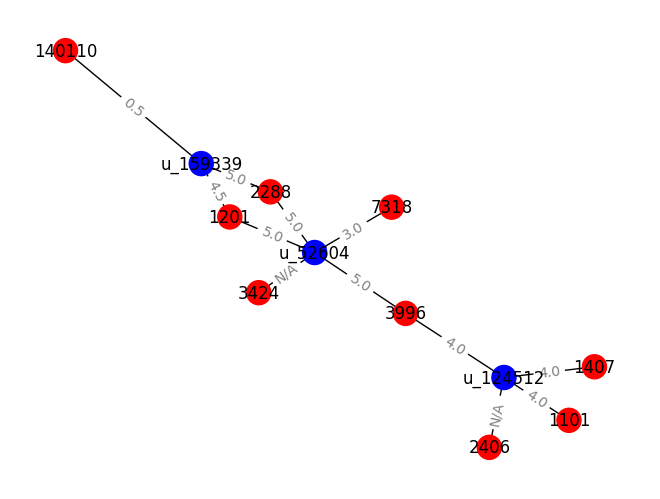

In [ ]:

import random


# Crea un grafo bipartito G (assicurati di averlo creato in precedenza come hai fatto)
# ...

# Definisci il dizionario per memorizzare i pesi degli archi
edge_weights = {}
for edge in G.edges(data=True):
    user_id, movie_id, weight = edge
    edge_weights[(user_id, movie_id)] = weight['weight']

# Estrai tre utenti casuali
users_to_plot = random.sample([user_id for user_id in G.nodes if G.nodes[user_id]['bipartite'] == 0], 3)

# Estrai i film associati a ciascun utente casuale
movies_to_plot = {}
for user_id in users_to_plot:
    movies_to_plot[user_id] = random.sample(list(G.neighbors(user_id)), 3)

# Estrai un sottografo contenente solo gli utenti e i film da plottare
nodes_to_plot = users_to_plot + [movie for movies in movies_to_plot.values() for movie in movies]
subgraph = G.subgraph(nodes_to_plot)

# Estrai il layout per il plot (puoi utilizzare altri layout a tua scelta)
layout = nx.spring_layout(subgraph)

# Estrai i colori dei nodi per il plot
node_colors = ['blue' if node in users_to_plot else 'red' for node in subgraph.nodes]

# Plotta il sottografo con i nodi utente in blu, i nodi film in rosso e gli archi grigi
nx.draw(subgraph, layout, node_color=node_colors, with_labels=True)

# Aggiungi etichette con i pesi degli archi
edge_labels = {}
for edge in subgraph.edges:
    user, movie = edge
    if edge in edge_weights:
        edge_labels[edge] = str(edge_weights[edge])
    else:
        edge_labels[edge] = "N/A"  # Puoi personalizzare il testo in caso di mancata corrispondenza dei pesi

nx.draw_networkx_edge_labels(subgraph, layout, edge_labels=edge_labels, font_color='gray')

# Mostra il plot
plt.show()





In [ ]:
user_id_to_find ='u_92316'
movie_id_to_find = 4392

# Leggi il tuo DataFrame "ratings" (assicurati di averlo caricato in precedenza)
# df = pd.read_csv('nome_del_tuo_file.csv')  # Sostituisci con il percorso del tuo file CSV se necessario

# Filtra le righe per l'utente specifico e il film specifico
user_movie_row = df[(df['userId'] == user_id_to_find) & (df['movieId'] == movie_id_to_find)]

# Stampa la riga relativa all'utente e al film specifico
print(user_movie_row)


           userId  movieId  rating  timestamp
14257658  u_92316     4392     4.0  995834362


In [ ]:
if G.has_edge(user_id_to_find, movie_id_to_find):
    weight = G[user_id_to_find][movie_id_to_find]['weight']
    print(f"Peso dell'arco tra l'utente {user_id_to_find} e il film {movie_id_to_find}: {weight}")

else:
    print(f"Nessun arco tra l'utente {user_id_to_find} e il film {movie_id_to_find}")

Peso dell'arco tra l'utente u_92316 e il film 4392: 4.0


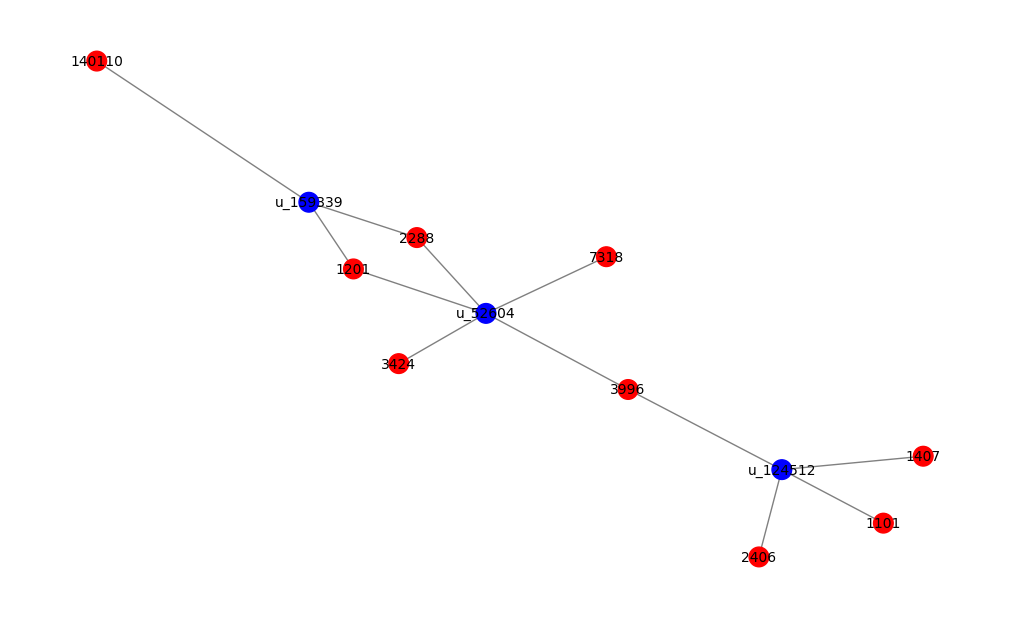

In [ ]:
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del plot
node_size = 200  # Imposta le dimensioni dei nodi
font_size = 10  # Imposta la dimensione del testo per le etichette
edge_width = 1.0  # Imposta la larghezza degli archi
edge_color = 'gray'  # Imposta il colore degli archi

# Plotta il sottografo con le impostazioni personalizzate
nx.draw(subgraph, layout, node_color=node_colors, node_size=node_size, font_size=font_size,
        width=edge_width, edge_color=edge_color, with_labels=True)

# Mostra il plot
plt.show()


In [ ]:
# Verifica che tutti gli archi abbiano un valore diverso da "N/A"
# Verifica che tutti gli archi abbiano un valore diverso da "N/A"
valid = True  # Imposta una variabile per verificare la validità della rete

# Verifica che tutti gli archi abbiano un valore diverso da "N/A"
for edge in G.edges:
    if edge not in edge_weights or edge_weights[edge] == "N/A":
        valid = False  # Imposta la variabile a False se trova un arco non valido
        print(f"L'arco {edge} ha un valore mancante o 'N/A' come etichetta.")

# Verifica se la rete è valida e stampa il messaggio appropriato
if valid:
    print("Rete valida")
else:
    print("Rete non valida")




Rete valida
